<a href="https://colab.research.google.com/github/mkirby1995/DS-Unit-2-Sprint-2-Regression/blob/master/Polynomial_Log_linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## Your model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [0]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
rcParams['figure.figsize'] = 19, 10

##Import Data


[`pandas.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)




In [0]:
Ames = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'

df = pd.read_csv(Ames)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)



---



##Clean Data and Engineer Features

###Examine Null Values

In [6]:
for _ in range(len(df.columns)):
  if df.isnull().sum()[_] > 0:
    print(df.isnull().sum().index[_], df.isnull().sum()[_])

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [0]:
clean_cols = []



---



###Feature Engineering and Cleaning

####Explore DF

In [8]:
df.cov()['SalePrice']

Id              -7.340732e+05
MSSubClass      -2.832337e+05
LotFrontage      7.124262e+05
LotArea          2.092111e+08
OverallQual      8.690413e+04
OverallCond     -6.882739e+03
YearBuilt        1.254637e+06
YearRemodAdd     8.317079e+05
MasVnrArea       6.854858e+06
BsmtFinSF1       1.400137e+07
BsmtFinSF2      -1.458175e+05
BsmtUnfSF        7.528864e+06
TotalBsmtSF      2.138442e+07
1stFlrSF         1.860663e+07
2ndFlrSF         1.107415e+07
LowQualFinSF    -9.890980e+04
GrLivArea        2.958187e+07
BsmtFullBath     9.362786e+03
BsmtHalfBath    -3.194849e+02
FullBath         2.453808e+04
HalfBath         1.135024e+04
BedroomAbvGr     1.090147e+04
KitchenAbvGr    -2.378952e+03
TotRmsAbvGrd     6.891717e+04
Fireplaces       2.391325e+04
GarageYrBlt      9.489296e+05
GarageCars       3.802018e+04
GarageArea       1.058910e+07
WoodDeckSF       3.230258e+06
OpenPorchSF      1.662523e+06
EnclosedPorch   -6.243049e+05
3SsnPorch        1.038372e+05
ScreenPorch      4.936535e+05
PoolArea  

In [9]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64




---



####Explore SalePrice

In [10]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

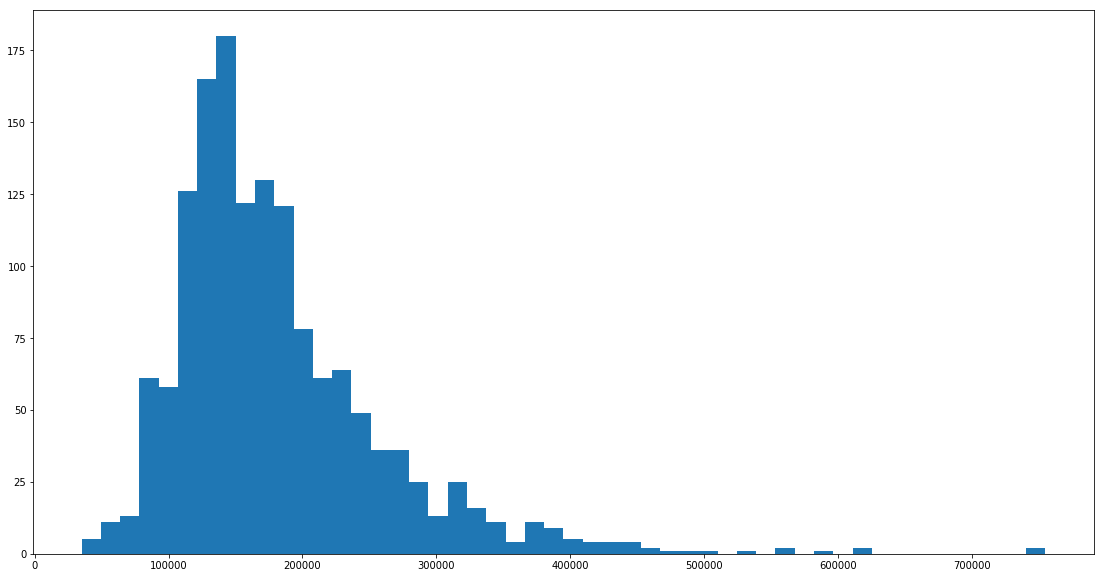

In [11]:
plt.hist(df['SalePrice'], bins=50);



---



####Natural Log of Price

In [0]:
df['ln_price'] = np.log(df['SalePrice'])

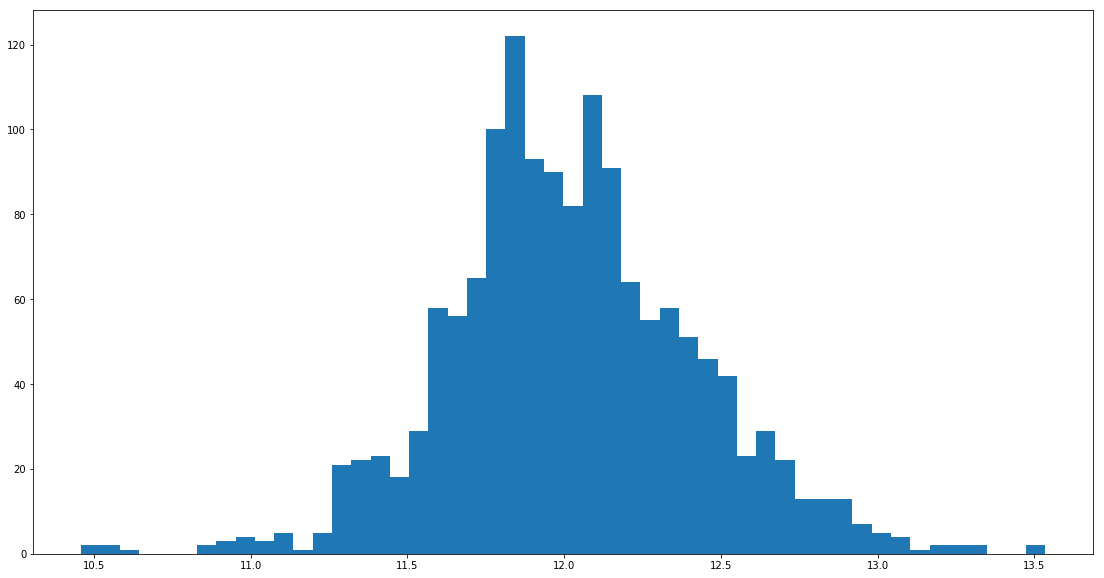

In [13]:
plt.hist(df['ln_price'], bins=50);



---



####Engineer Neighborhood Score

In [14]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

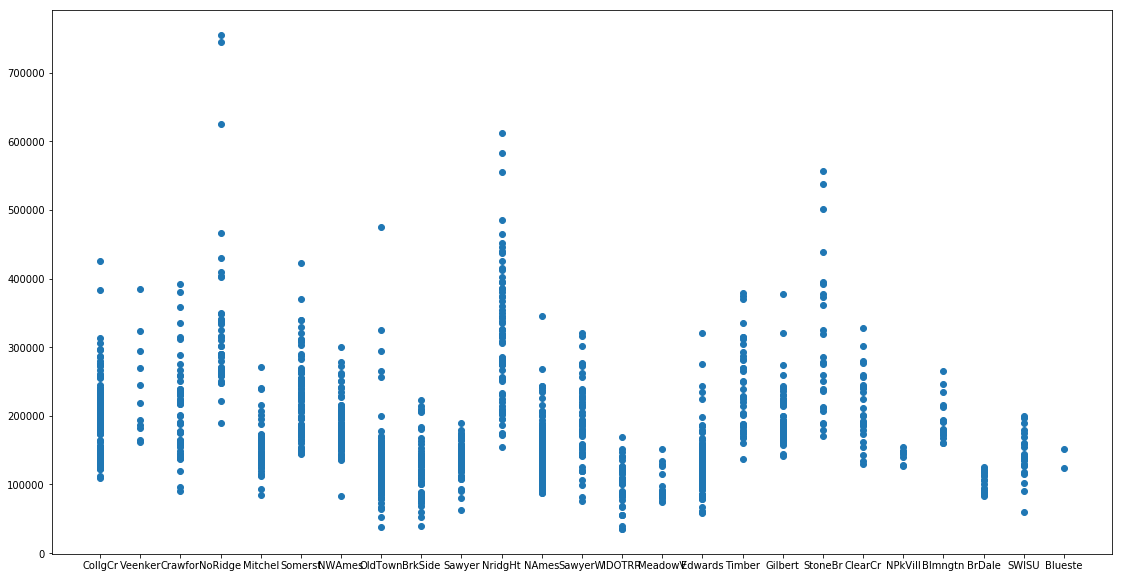

In [15]:
plt.scatter(df['Neighborhood'], df['SalePrice']);

Create a df with each neighborhood sorted by median sale price

In [16]:
mean_price_nei = pd.pivot_table(data = df, values='SalePrice', index='Neighborhood', columns=None, aggfunc='median')

sorted_means = mean_price_nei.sort_values(by='SalePrice', ascending=False)

sorted_means

,SalePrice
Neighborhood,
NridgHt,315000
NoRidge,301500
StoneBr,278000
Timber,228475
Somerst,225500
Veenker,218000
Crawfor,200624
ClearCr,200250
CollgCr,197200


In [0]:
neighborhood_names = []
neighborhood_scores =[]

for _ in range(len(sorted_means)):
  #print(sorted_means.index[_], sorted_means['SalePrice'][_])
  neighborhood_names.append(sorted_means.index[_])


In [0]:
for _ in range(len(neighborhood_names)):
  neighborhood_scores.append(25 - _)
  


In [19]:
neighborhoodz = dict(zip(neighborhood_names, neighborhood_scores))
neighborhoodz

{'Blmngtn': 16,
 'Blueste': 8,
 'BrDale': 3,
 'BrkSide': 6,
 'ClearCr': 18,
 'CollgCr': 17,
 'Crawfor': 19,
 'Edwards': 5,
 'Gilbert': 14,
 'IDOTRR': 2,
 'MeadowV': 1,
 'Mitchel': 12,
 'NAmes': 10,
 'NPkVill': 11,
 'NWAmes': 15,
 'NoRidge': 24,
 'NridgHt': 25,
 'OldTown': 4,
 'SWISU': 9,
 'Sawyer': 7,
 'SawyerW': 13,
 'Somerst': 21,
 'StoneBr': 23,
 'Timber': 22,
 'Veenker': 20}

In [20]:
df['neighborhood_score'] = df['Neighborhood'].replace(neighborhoodz)
df['neighborhood_score'].describe()

count    1460.000000
mean       12.838356
std         6.686757
min         1.000000
25%         7.000000
50%        13.000000
75%        17.000000
max        25.000000
Name: neighborhood_score, dtype: float64

In [0]:
clean_cols.append('neighborhood_score')



---



#### Engineer House Score

#####OverallQual

- OverallQual: Rates the overall material and finish of the house (1 - 10)

In [22]:
df['OverallQual'].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

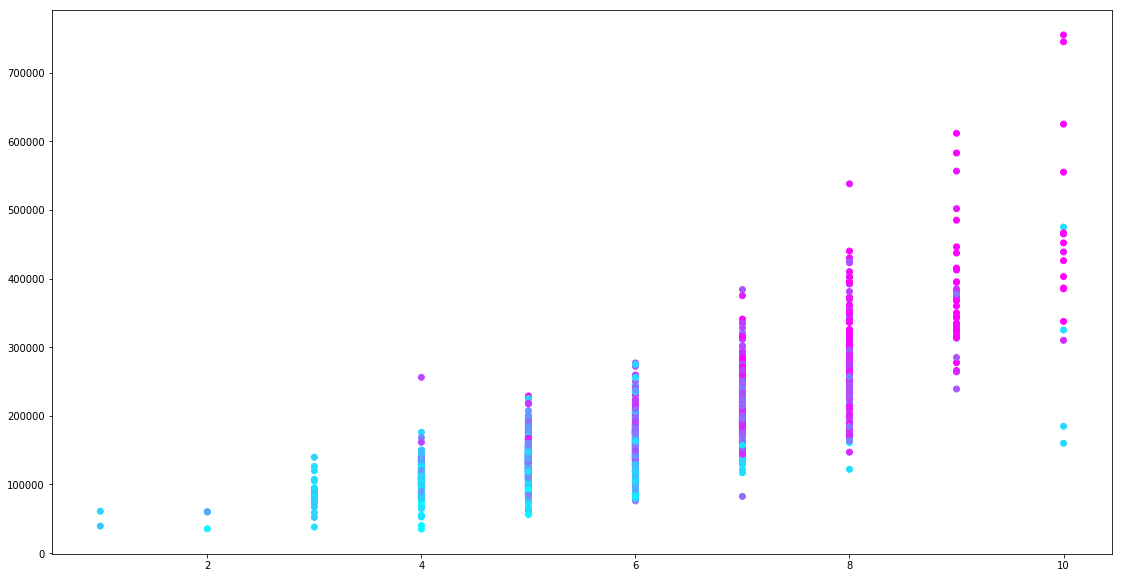

In [23]:
plt.scatter(df['OverallQual'], df['SalePrice'], c=df['neighborhood_score'], cmap='cool')
plt.show();



---



#####OverallCond

- OverallCond: Rates the overall condition of the house (1 - 10)

In [24]:
df['OverallCond'].describe()

count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

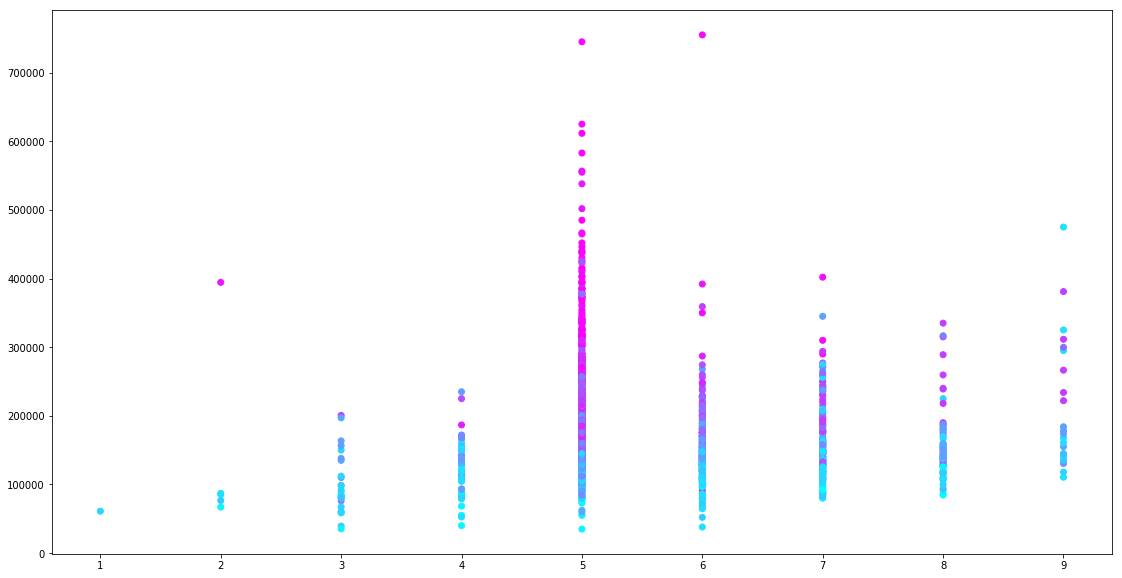

In [25]:
plt.scatter(df['OverallCond'], df['SalePrice'], c=df['neighborhood_score'], cmap='cool')
plt.show();



---



#####ExterQual

- ExterQual: Evaluates the quality of the material on the exterior (1 - 5)

In [0]:
df['ExterQual'] = df['ExterQual'].replace({'Ex':5, 'Gd':4, 'TA':3,
                                           'Fa':2, 'Po':1})

In [27]:
df['ExterQual'].describe()

count     1460
unique       4
top          3
freq       906
Name: ExterQual, dtype: int64

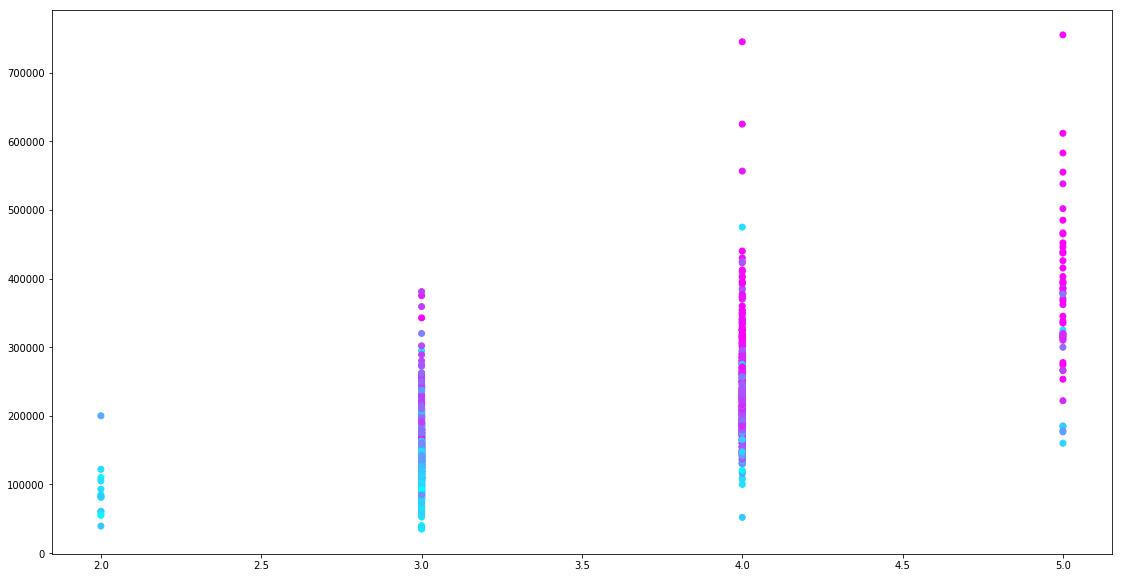

In [28]:
plt.scatter(df['ExterQual'], df['SalePrice'], c=df['neighborhood_score'], cmap='cool')
plt.show();



---



#####ExterCond

- ExterCond: Evaluates the present condition of the material on the exterior (1 - 5)


In [0]:
df['ExterCond'] = df['ExterCond'].replace({'Ex':5, 'Gd':4, 'TA':3,
                                           'Fa':2, 'Po':1})

In [30]:
df['ExterCond'].describe()

count    1460.000000
mean        3.083562
std         0.351054
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: ExterCond, dtype: float64

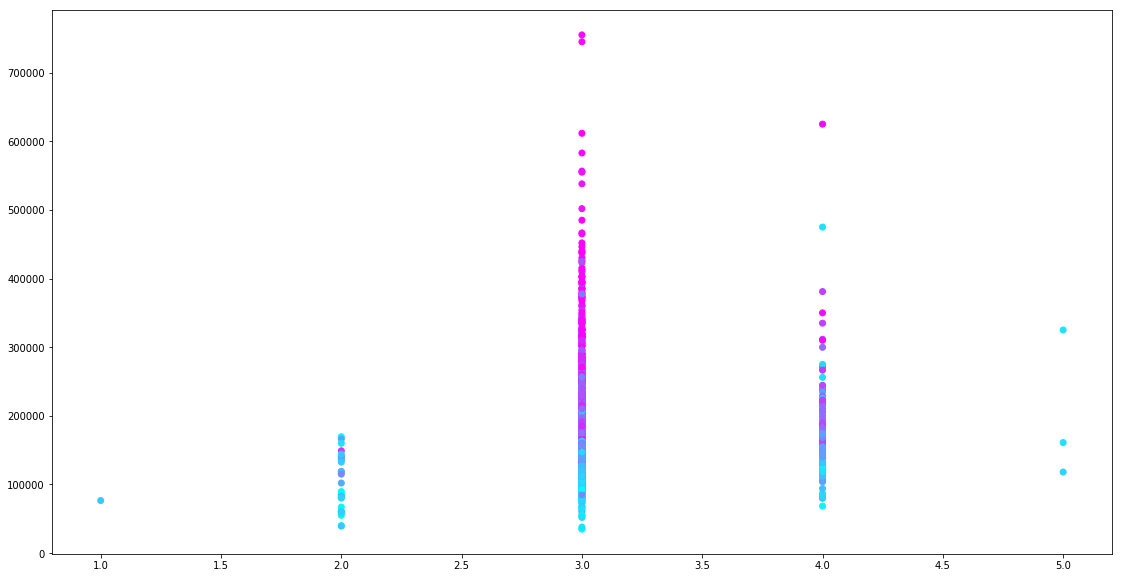

In [31]:
plt.scatter(df['ExterCond'], df['SalePrice'], c=df['neighborhood_score'], cmap='cool')
plt.show();



---



#####HeatingQC

- HeatingQC: Heating quality and condition (1 - 5)


In [0]:
df['HeatingQC'] = df['HeatingQC'].replace({'Ex':5, 'Gd':4, 'TA':3,
                                           'Fa':2, 'Po':1})

In [33]:
df['HeatingQC'].describe()

count    1460.000000
mean        4.145205
std         0.959501
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: HeatingQC, dtype: float64

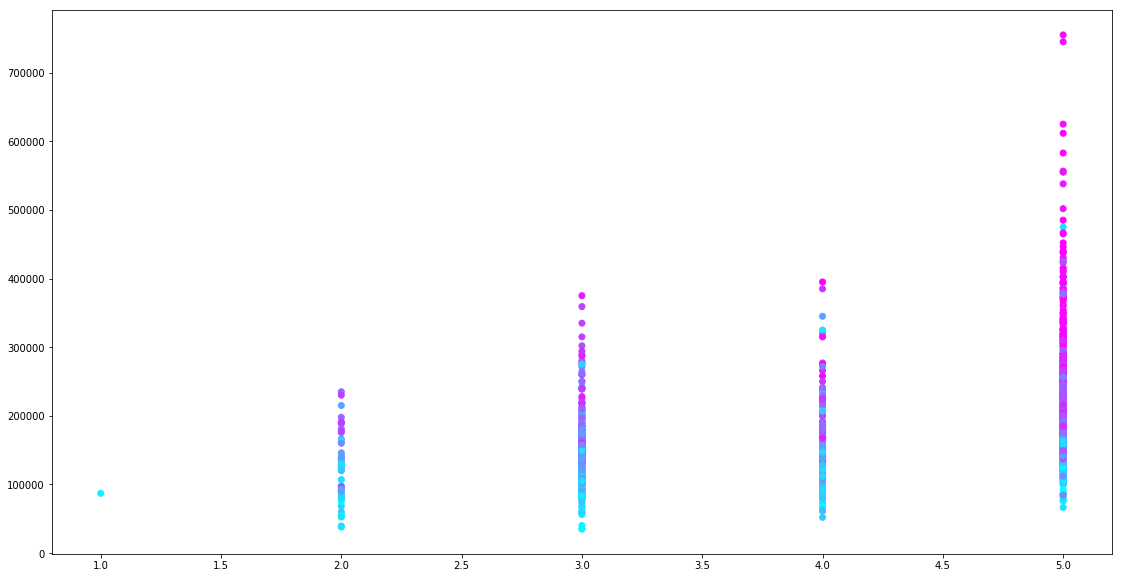

In [34]:
plt.scatter(df['HeatingQC'], df['SalePrice'], c=df['neighborhood_score'], cmap='cool')
plt.show();



---



#####KitchenQual

- KitchenQual: Kitchen quality (1 - 5)

In [0]:
df['KitchenQual'] = df['KitchenQual'].replace({'Ex':5, 'Gd':4, 'TA':3,
                                               'Fa':2, 'Po':1})

In [0]:
df['KitchenQual'] = df['KitchenQual'].astype('int64')

In [37]:
df['KitchenQual'].describe()

count    1460.000000
mean        3.511644
std         0.663760
min         2.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: KitchenQual, dtype: float64

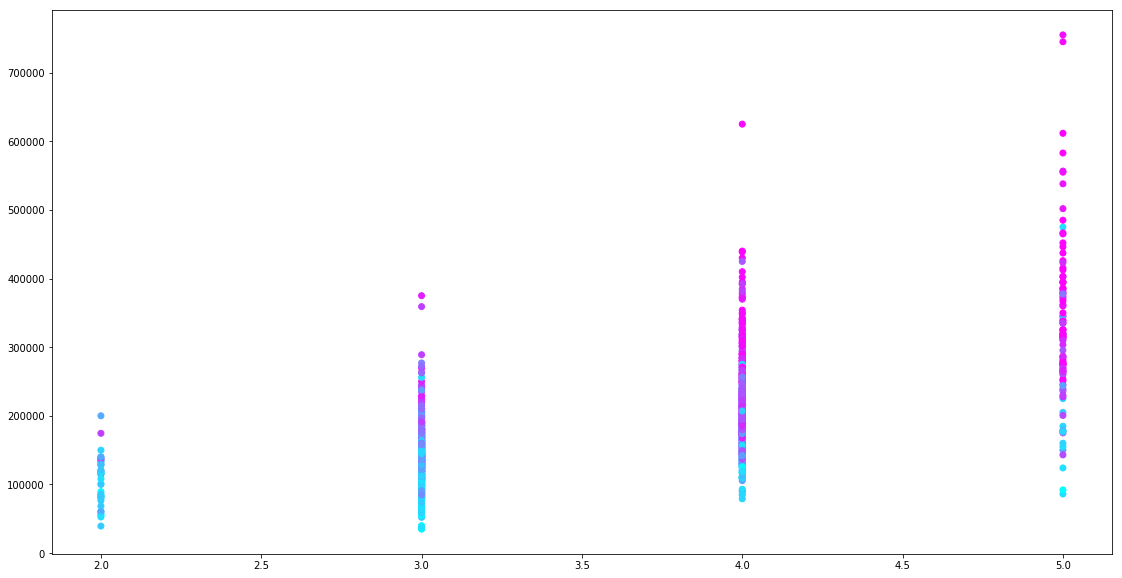

In [38]:
plt.scatter(df['KitchenQual'], df['SalePrice'], c=df['neighborhood_score'], cmap='cool')
plt.show();



---



#####GarageQual

- GarageQual: Garage quality (0 - 5)

In [0]:
df['GarageQual'] = df['GarageQual'].replace({'Ex':5, 'Gd':4, 'TA':3,
                                             'Fa':2, 'Po':1, 'NA': 0,})

In [0]:
df['GarageQual'] = df['GarageQual'].fillna(0)

In [0]:
df['GarageQual'] = df['GarageQual'].astype('int64')

In [42]:
df['GarageQual'].describe()

count    1460.000000
mean        2.810274
std         0.722898
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: GarageQual, dtype: float64

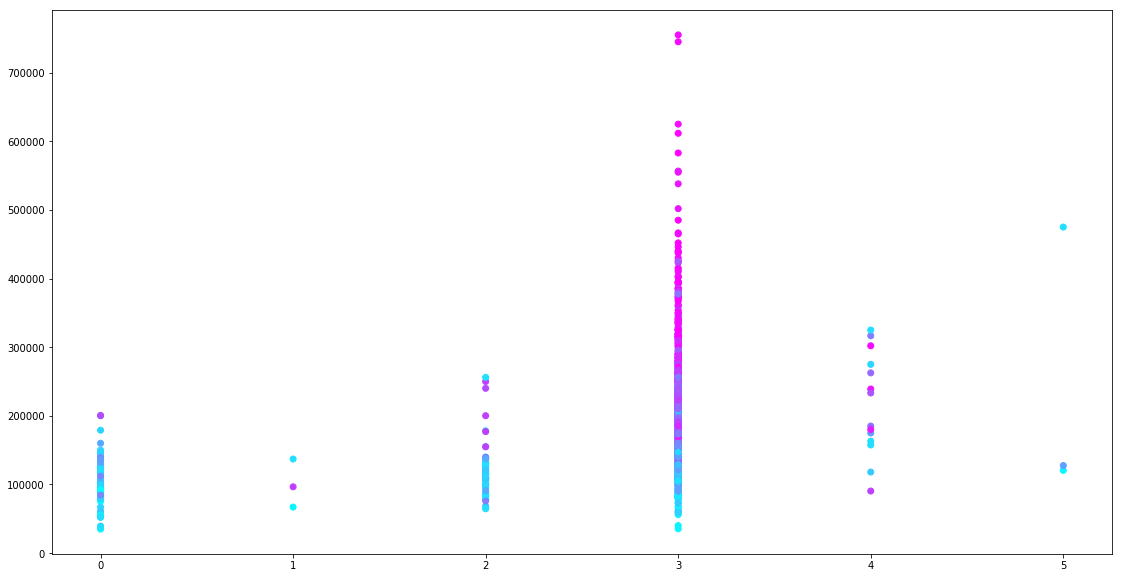

In [43]:
plt.scatter(df['GarageQual'], df['SalePrice'], c=df['neighborhood_score'], cmap='cool')
plt.show();



---



#####GarageCond

- GarageCond: Garage condition (0 - 5)


In [0]:
df['GarageCond'] = df['GarageCond'].replace({'Ex':5, 'Gd':4, 'TA':3,
                                             'Fa':2, 'Po':1, 'NA': 0})

In [0]:
df['GarageCond'] = df['GarageCond'].fillna(0)

In [0]:
df['GarageCond'] = df['GarageCond'].astype('int64')

In [47]:
df['GarageCond'].describe()

count    1460.000000
mean        2.808904
std         0.719685
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: GarageCond, dtype: float64

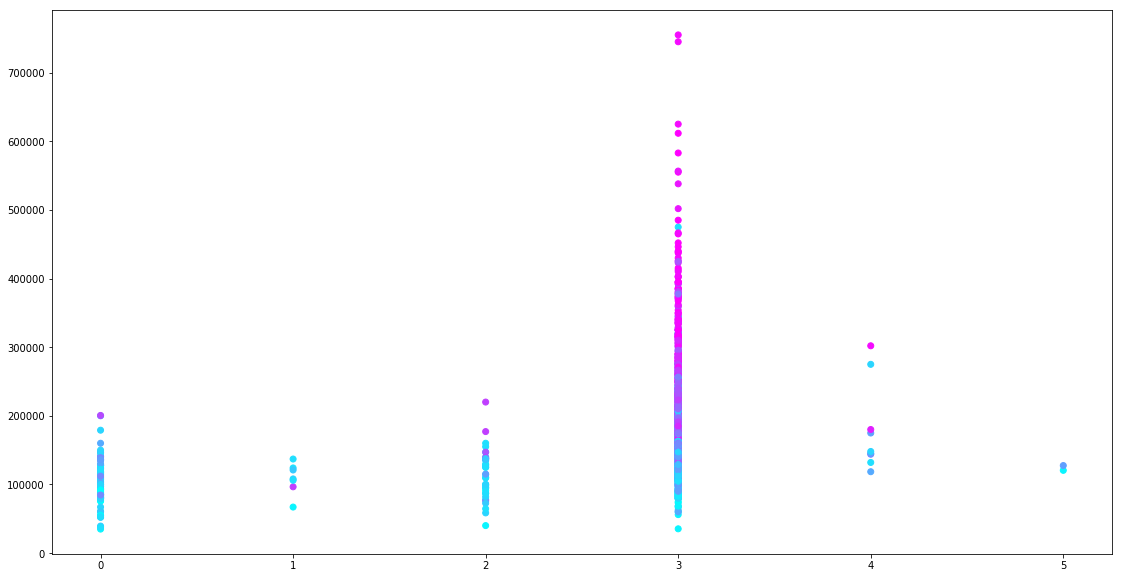

In [48]:
plt.scatter(df['GarageCond'], df['SalePrice'], c=df['neighborhood_score'], cmap='cool')
plt.show();



---



#####BsmtCond

- BsmtCond: Evaluates the general condition of the basement (0 - 5)

In [0]:
df['BsmtCond'] = df['BsmtCond'].replace({'Ex':5, 'Gd':4, 'TA':3,
                                         'Fa':2, 'Po':1, 'NA': 0})

In [0]:
df['BsmtCond'] = df['BsmtCond'].fillna(0)

In [51]:
df['BsmtCond'].describe()

count    1460.000000
mean        2.934932
std         0.552159
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: BsmtCond, dtype: float64

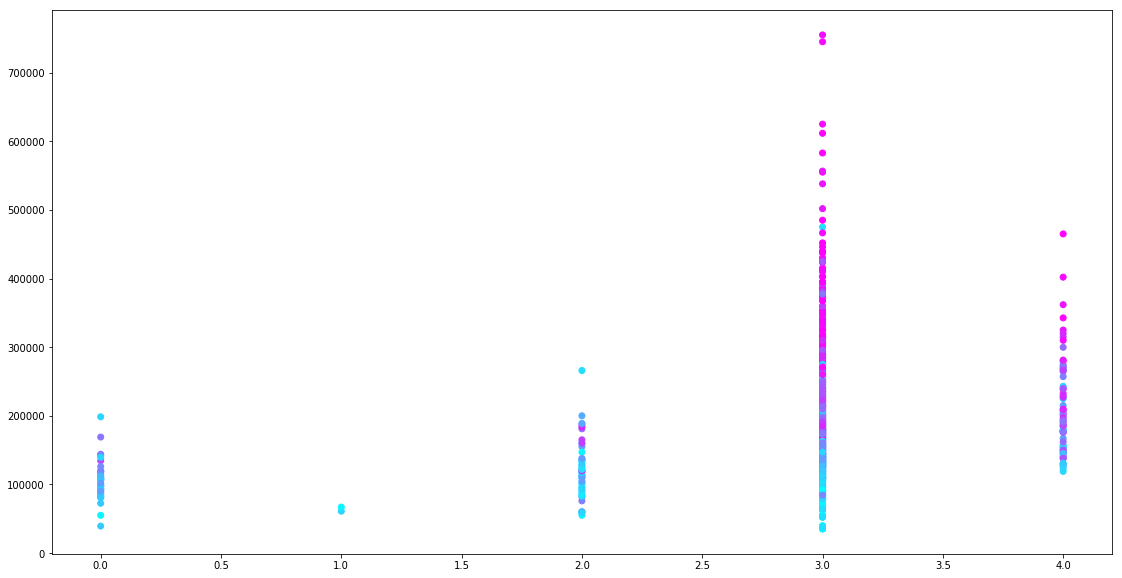

In [52]:
plt.scatter(df['BsmtCond'], df['SalePrice'], c=df['neighborhood_score'], cmap='cool')
plt.show();



---



#####Engineer Property Score

In [0]:
Prop_cols = [df['OverallQual'], df['OverallCond'], df['ExterQual'],
             df['ExterCond'], df['KitchenQual'], df['HeatingQC'],
             df['GarageQual'], df['GarageCond'], df['BsmtCond']]

In [54]:
df['property_score'] = sum(Prop_cols)

df['property_score'].value_counts()

37    227
33    160
38    146
36    143
32    122
34    120
35    107
31    103
39     56
30     47
41     32
40     30
29     29
27     25
26     22
28     22
42     19
25     11
23      8
24      7
22      6
21      4
43      3
13      1
16      1
15      1
19      1
17      1
48      1
20      1
47      1
44      1
45      1
12      1
Name: property_score, dtype: int64

In [55]:
df['property_score'].isnull().sum()

0

In [0]:
df['property_score'] = df['property_score'].astype('int64')

In [57]:
df['property_score'].describe()

count    1460.000000
mean       34.365068
std         4.043324
min        12.000000
25%        32.000000
50%        35.000000
75%        37.000000
max        48.000000
Name: property_score, dtype: float64

In [0]:
clean_cols.append('property_score')



---



####Explore MSSubClass [Encode]

In [59]:
df['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

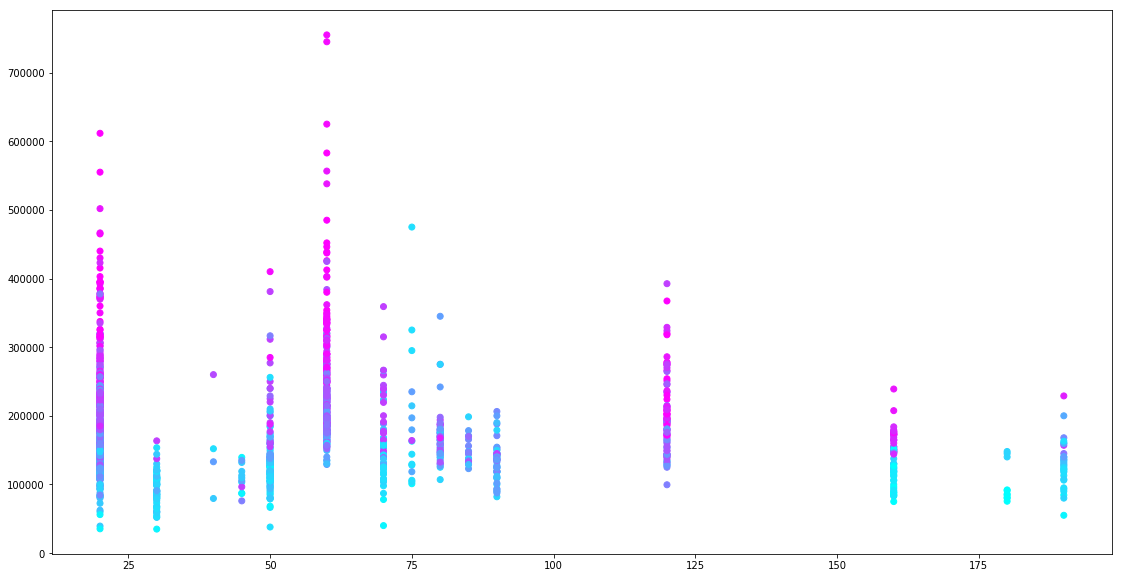

In [60]:
plt.scatter(df['MSSubClass'], df['SalePrice'], c=df['neighborhood_score'], cmap='cool');



---



####Engineer Lot Composite Score

#####Explore MSZoning

In [0]:
df['MSZoning'] = df['MSZoning'].replace({'RL':5,'FV':4,'RM':3,'RH':2,'C (all)':1})

In [62]:
df['MSZoning'].describe()

count    1460.000000
mean        4.596575
std         0.829289
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: MSZoning, dtype: float64

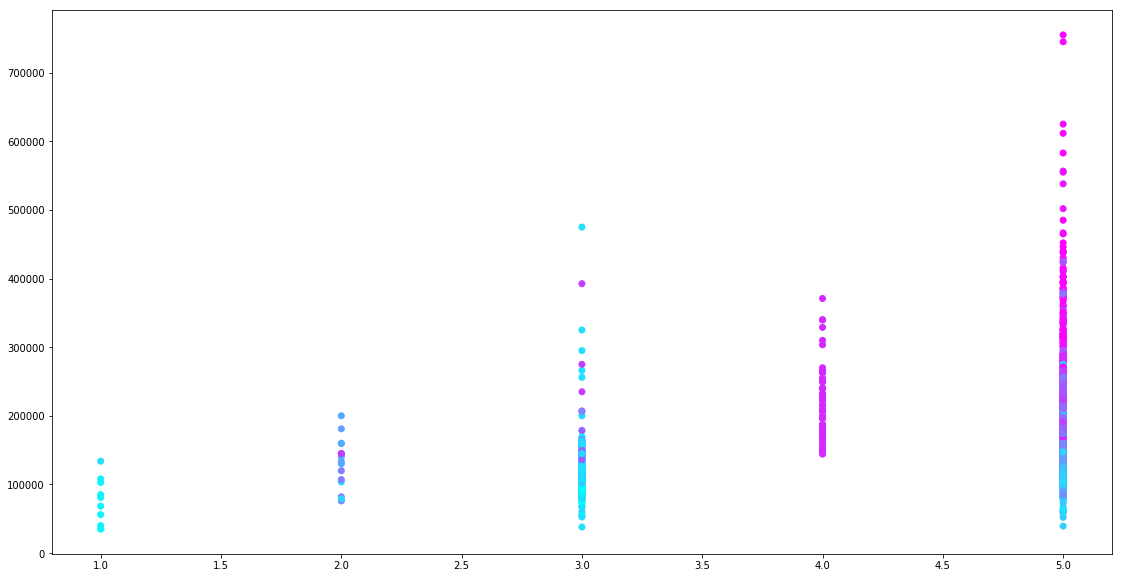

In [63]:
plt.scatter(df['MSZoning'], df['SalePrice'], c=df['neighborhood_score'], cmap='cool');



---



#####Encode Street

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

In [0]:
df['Street'] = df['Street'].replace({'Grvl':0, 'Pave':1})

In [65]:
df['Street'].describe()

count    1460.000000
mean        0.995890
std         0.063996
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Street, dtype: float64

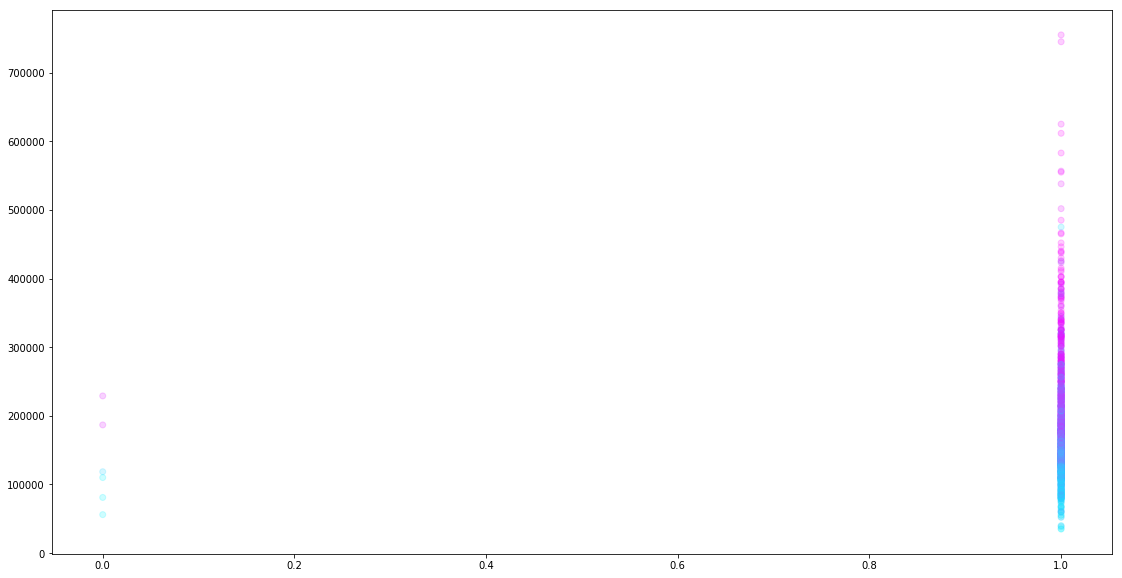

In [66]:
plt.scatter(df['Street'], df['SalePrice'], alpha=.2, c=df['neighborhood_score'], cmap='cool')
plt.show();



---



#####Encode LotShape

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [0]:
df['LotShape'] = df['LotShape'].replace({'Reg':4,'IR1':3,'IR2':2,'IR3':1})

In [68]:
df['LotShape'].isnull().sum()

0

In [0]:
df['LotShape'] = df['LotShape'].astype('int64')

In [70]:
df['LotShape'].describe()

count    1460.000000
mean        3.591781
std         0.582296
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: LotShape, dtype: float64

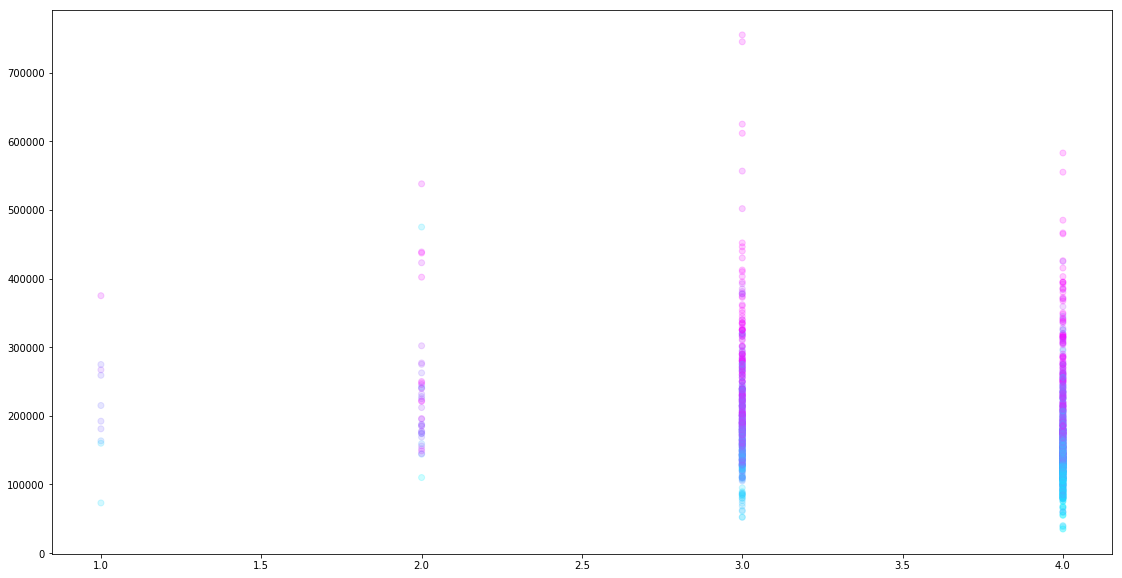

In [71]:
plt.scatter(df['LotShape'], df['SalePrice'], alpha=.2, c=df['neighborhood_score'], cmap='cool')
plt.show();



---



#####Encode LandContour

LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [72]:
df['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [0]:
df['LandContour'] = df['LandContour'].replace({'Lvl':4, 'Bnk':2, 'HLS':3, 'Low':1})

In [74]:
df['LandContour'].describe()

count    1460.000000
mean        3.805479
std         0.625457
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: LandContour, dtype: float64

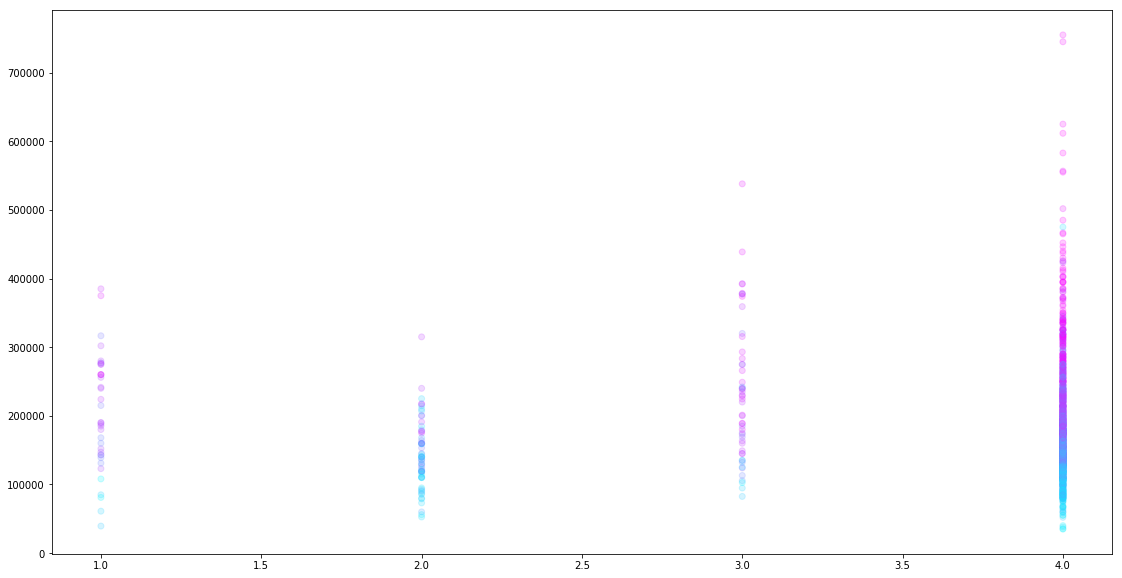

In [75]:
plt.scatter(df['LandContour'], df['SalePrice'], alpha=.2, c=df['neighborhood_score'], cmap='cool')
plt.show();



---



#####Encode Utilities

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

In [76]:
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [0]:
df['Utilities'] = df['Utilities'].replace({'AllPub':1, 'NoSeWa':0})

In [78]:
df['Utilities'].describe()

count    1460.000000
mean        0.999315
std         0.026171
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Utilities, dtype: float64

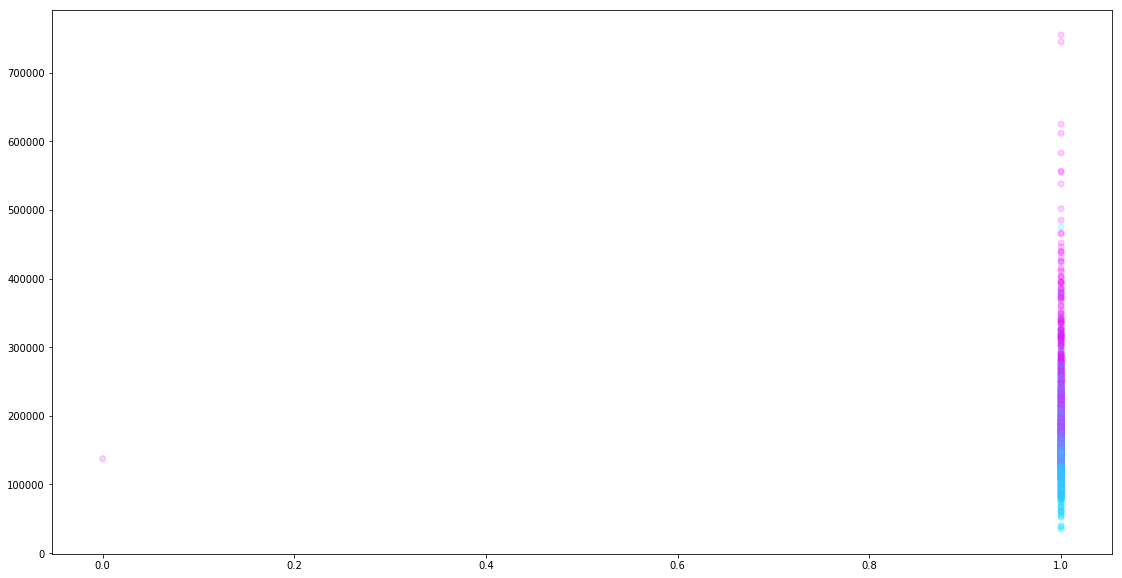

In [79]:
plt.scatter(df['Utilities'], df['SalePrice'], alpha=.2, c=df['neighborhood_score'], cmap='cool')
plt.show();



---



#####Encode LotConfig

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [80]:
df['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [81]:
Lots = df.groupby('LotConfig', axis=0).mean()
Lots['SalePrice']

LotConfig
Corner     181623.425856
CulDSac    223854.617021
FR2        177934.574468
FR3        208475.000000
Inside     176938.047529
Name: SalePrice, dtype: float64

In [0]:
df['LotConfig'] = df['LotConfig'].replace({'CulDSac':5, 'FR3':4, 'Corner':3, 'FR2':2, 'Inside':1})

In [83]:
df['LotConfig'].describe()

count    1460.000000
mean        1.658219
std         1.172699
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: LotConfig, dtype: float64

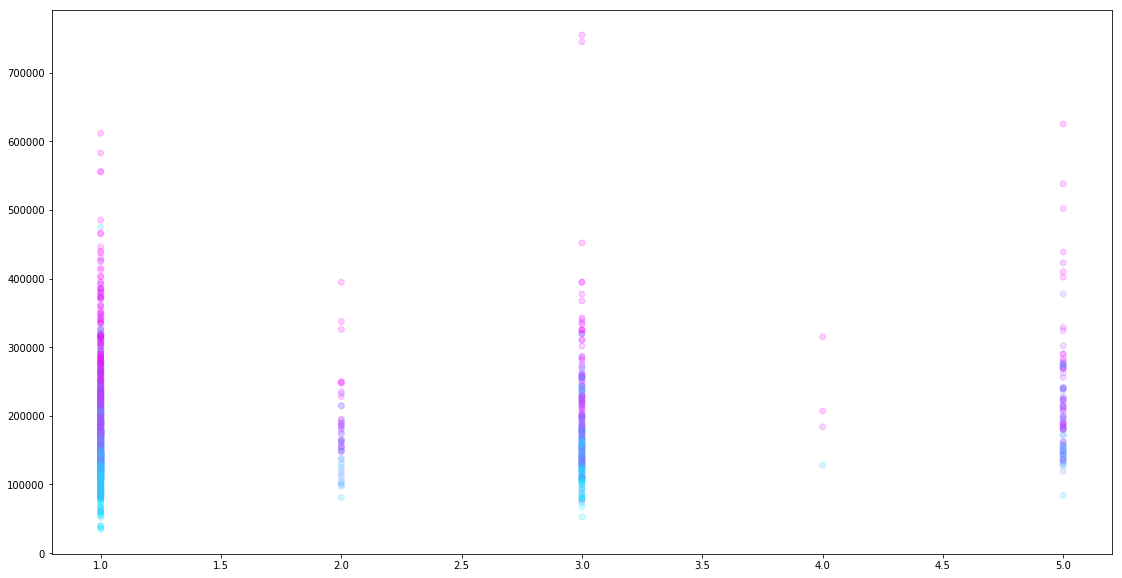

In [84]:
plt.scatter(df['LotConfig'], df['SalePrice'], alpha=.2, c=df['neighborhood_score'], cmap='cool')
plt.show();



---



#####LandSlope

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [85]:
df['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [86]:
Lots = df.groupby('LandSlope', axis=0).mean()
Lots['SalePrice']

LandSlope
Gtl    179956.799566
Mod    196734.138462
Sev    204379.230769
Name: SalePrice, dtype: float64

In [0]:
df['LandSlope'] = df['LandSlope'].replace({'Sev':3, 'Mod':2, 'Gtl':1})

In [88]:
df['LandSlope'].describe()

count    1460.000000
mean        1.062329
std         0.276232
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: LandSlope, dtype: float64

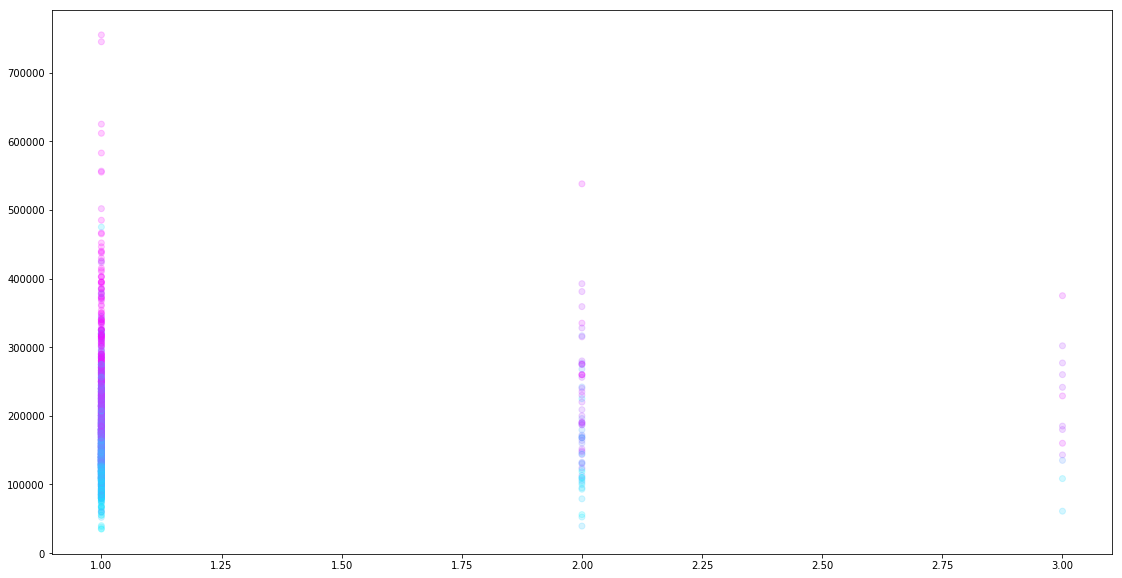

In [89]:
plt.scatter(df['LandSlope'], df['SalePrice'], alpha=.2, c=df['neighborhood_score'], cmap='cool')
plt.show();



---



####Clean and Explore LotFrontage

LotFrontage: Linear feet of street connected to property


In [90]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [91]:
df['LotFrontage'].median()

69.0

In [0]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

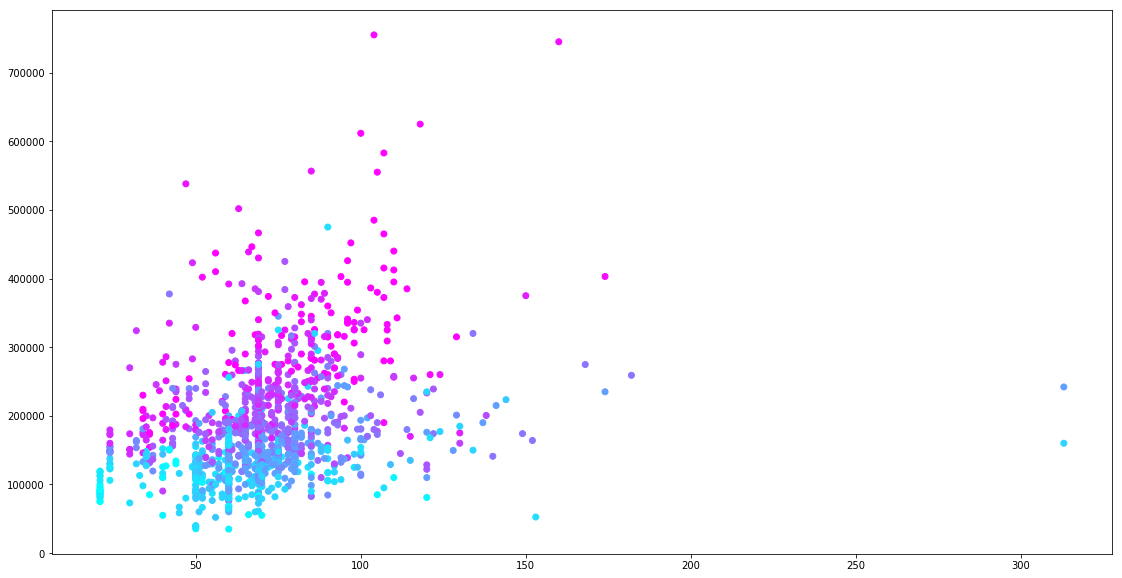

In [93]:
plt.scatter(df['LotFrontage'], df['SalePrice'], c=df['neighborhood_score'], cmap='cool')
plt.show();



---



####Explore LotArea

LotArea: Lot size in square feet

In [94]:
df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

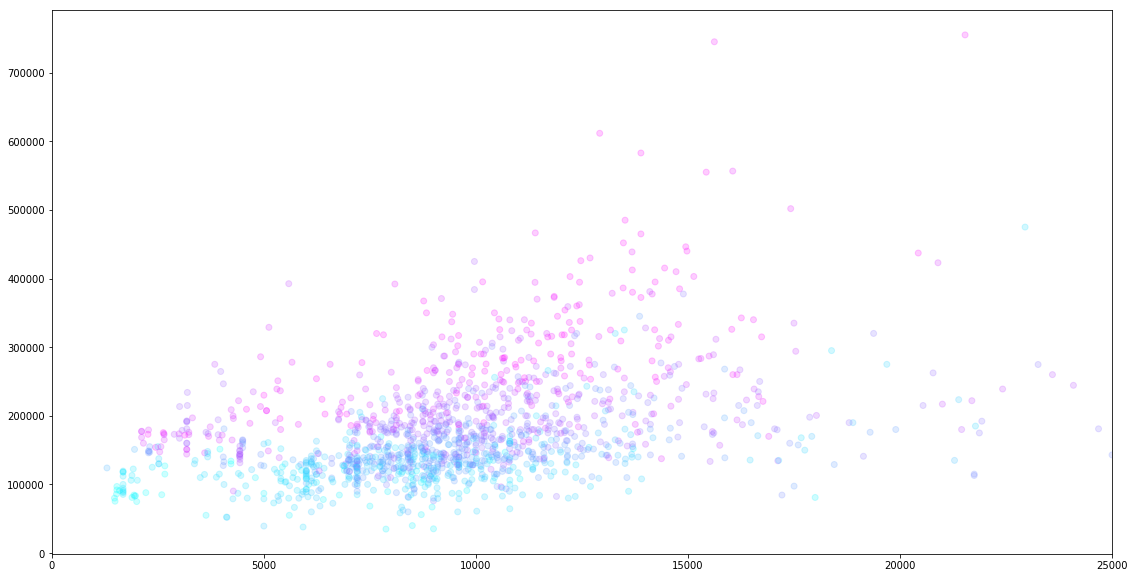

In [95]:
plt.scatter(df['LotArea'], df['SalePrice'], alpha=.2, c=df['neighborhood_score'], cmap='cool')
plt.xlim(0, 25000)
plt.show();



---



####Encode and Clean Alley

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

**Clean Alley**

In [0]:
df['Alley'] = df['Alley'].replace({'Grvl':1, 'Pave':2, np.NaN:3})



---



In [97]:
df['Alley'].describe()

count    1460.000000
mean        2.903425
std         0.394776
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: Alley, dtype: float64

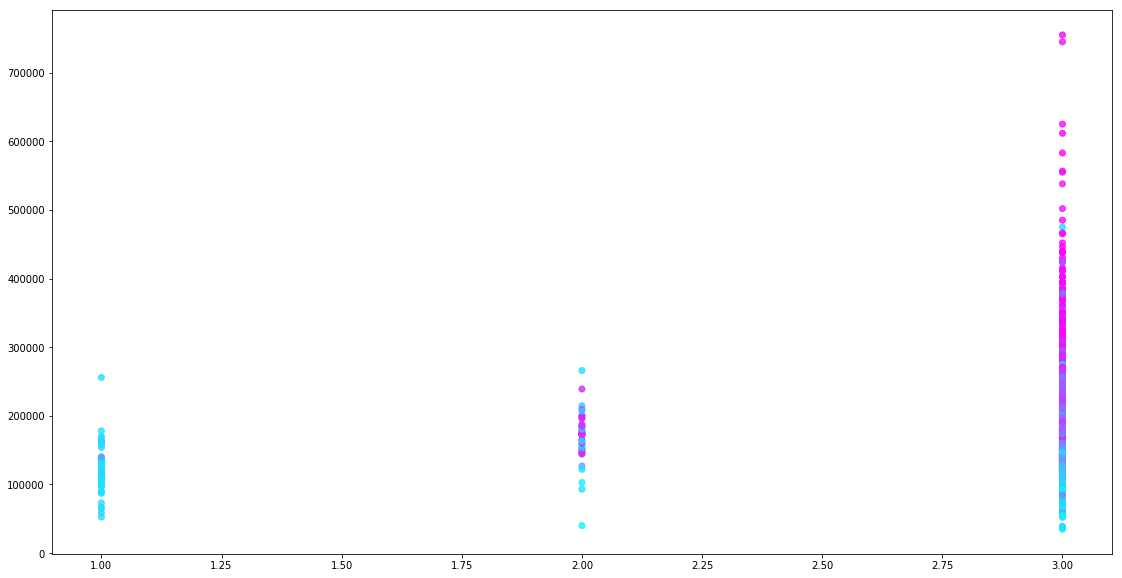

In [98]:
plt.scatter(df['Alley'], df['SalePrice'], alpha=.8, c=df['neighborhood_score'], cmap='cool')
plt.show();



---



####Clean MasVnrArea

MasVnrArea: Masonry veneer area in square feet


In [99]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [0]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

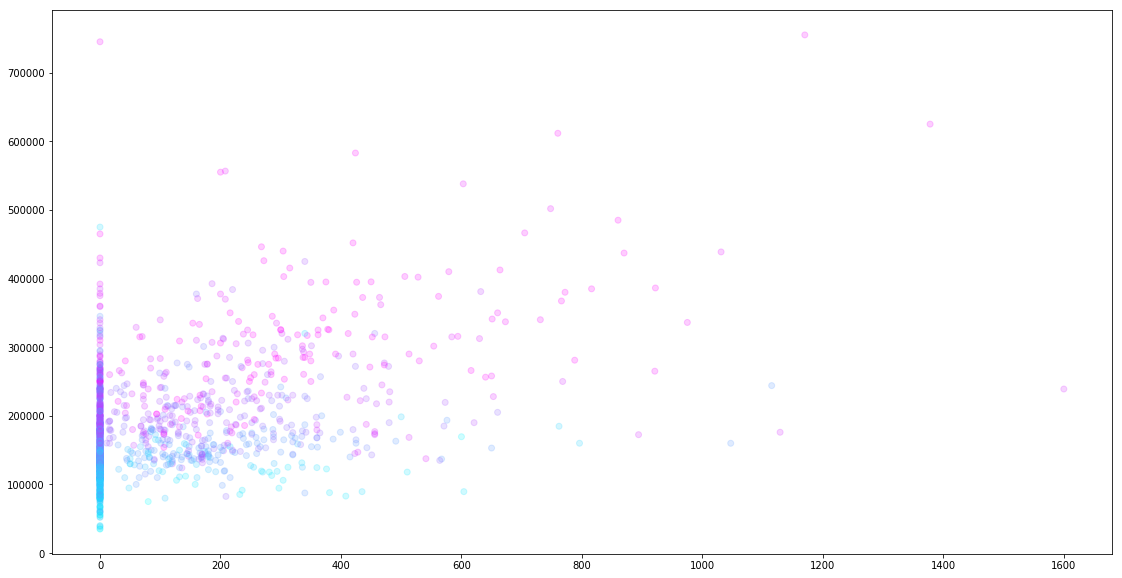

In [101]:
plt.scatter(df['MasVnrArea'], df['SalePrice'], alpha=.2, c=df['neighborhood_score'], cmap='cool')
plt.show();



---



####YearBuilt

YearBuilt: Original construction date



In [102]:
df['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [0]:
df['YearBuilt ** 2'] = df['YearBuilt'] ** 2

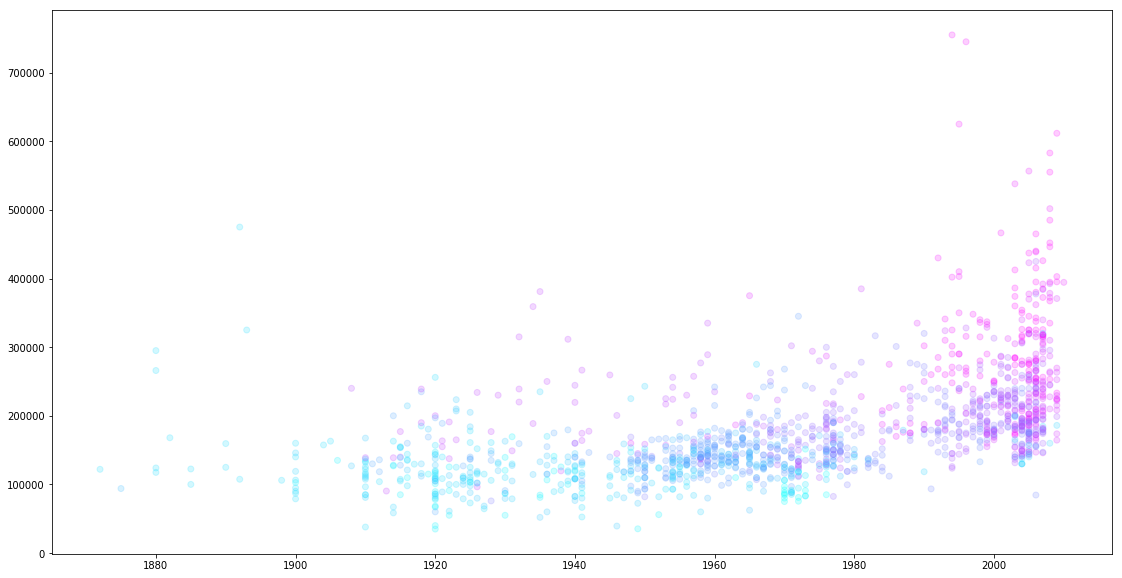

In [104]:
plt.scatter(df['YearBuilt'], df['SalePrice'], alpha=.2, c=df['neighborhood_score'], cmap='cool')
plt.show();



---



####Clean GarageYrBlt

In [105]:
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [0]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

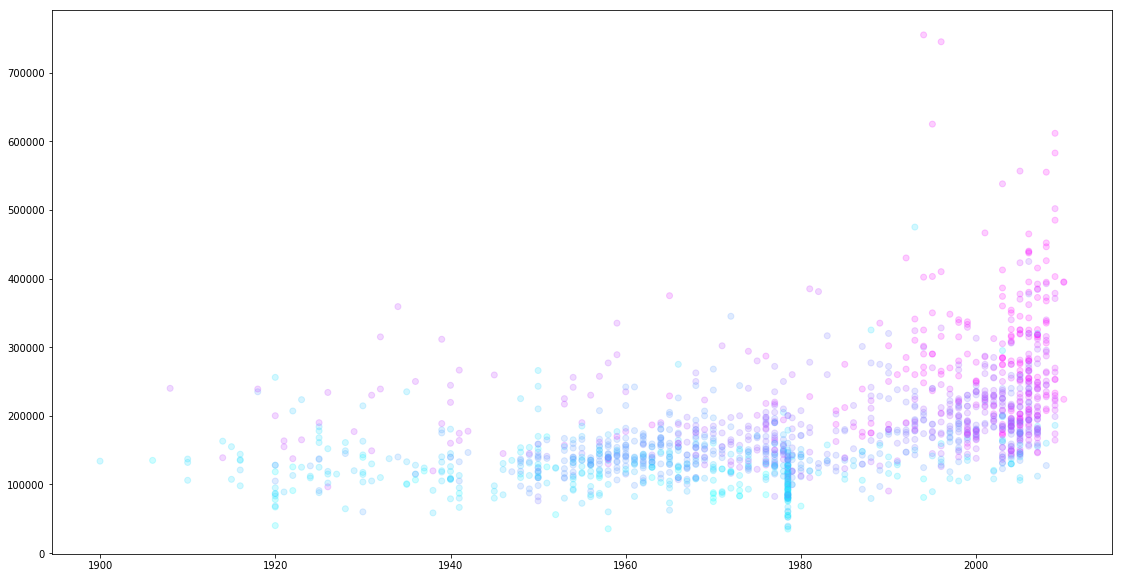

In [107]:
plt.scatter(df['GarageYrBlt'], df['SalePrice'], alpha=.2, c=df['neighborhood_score'], cmap='cool')
plt.show();



---



##Train Model

###Bivirate Model

In [0]:
def bv_model(target, feature_):
  """
  Given a feature column name and a target column name this function will fit a 
  bivirate model and display a plot.
  """
  # Set feature and target
  target = df[target]
  feature = np.array(df[feature_]).reshape(-1, 1)
  
  # Train test split
  xtrain, xtest, ytrain, ytest = train_test_split(feature, target, test_size = .2)
  #print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)
  
  # Set and fit model
  linreg = LinearRegression()
  linreg.fit(feature, target)

  # Intercept and Coefficient
  #beta_0 = linreg.intercept_
  #beta_i = linreg.coef_
  #print("Slope Coefficients: ", beta_i)
  #print("\nIntercept Value: ", beta_0)
  
  # RMSE and r^2
  print('Root Mean Squared Error\n', np.sqrt(mean_squared_error(target, linreg.predict(feature))))
  print('R-Squared Value\n', linreg.score(feature, target))
  
  # Create new series with predictions
  Bivariate_Prediction = pd.Series(linreg.predict(feature))

  # Plot results
  plt.scatter(df[feature_], target, c=target, cmap='cool')
  plt.plot(df[feature_], Bivariate_Prediction, c='black')
  plt.ylabel('target')
  plt.xlabel('feature')

  plt.show();
  

Root Mean Squared Error
 58056.52698501976
R-Squared Value
 0.4655663052679211


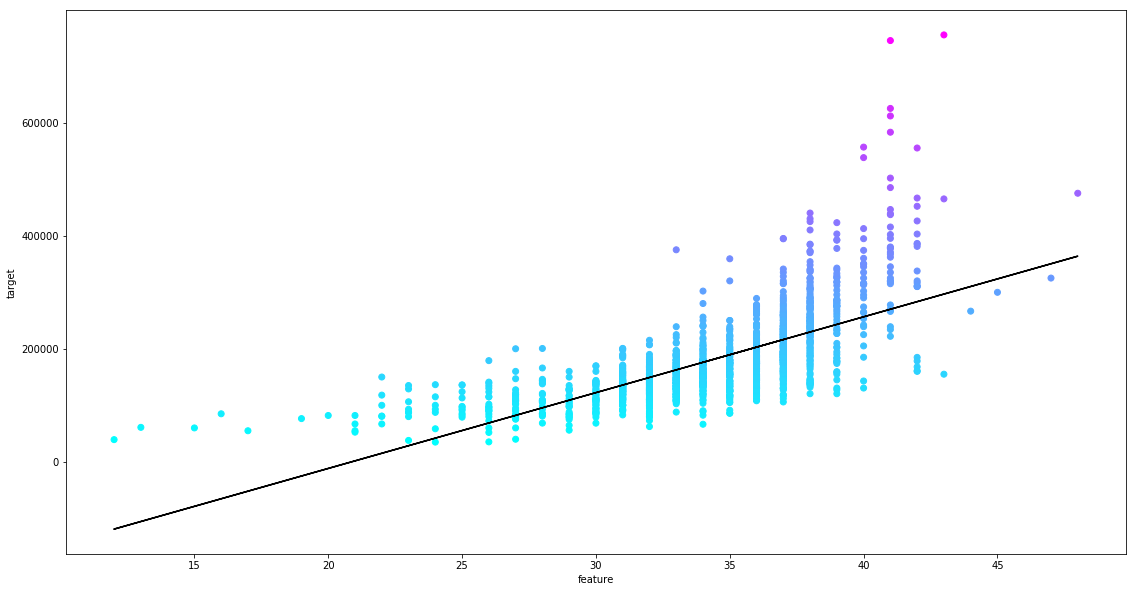

In [109]:
bv_model('SalePrice', 'property_score')



---



###Create Feature Set

All numerical columns

In [0]:
non_obj = []
for _ in range(len(df.dtypes)):
  if df.dtypes[_] != object:
    #print(df.dtypes.index[_], df.dtypes[_])
    non_obj.append(df.dtypes.index[_])

In [111]:
feature_list = df[non_obj]
feature_list = feature_list.drop(columns = ['Id', 'SalePrice', 'ln_price', 'Alley'])
feature_list.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterCond', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'neighborhood_score', 'property_score', 'YearBuilt ** 2'],
      dtype='object')

In [0]:
feature_list = feature_list.columns.tolist()

##Big Complex Regression Function

In [0]:
def do_linreg(target, feature_list, threshold = .5):
  """
  This function when given a threshold, target, and a list of columns will 
  fit a bivirate regression to each column and if the r^2 value is > the 
  threshold it will add that column to a list of features to fit a multiple
  regression.
  """
  multiple_reg_col_list = []
  # for loop to run bivirate regression
  for _ in range(len(feature_list)):
    # Set Feature
    feature = np.array(df[feature_list[_]]).reshape(-1, 1)
    
    # Train test split
    xtrain, xtest, ytrain, ytest = train_test_split(feature, target, test_size = .2)
    #print('Shapes\n', xtrain.shape, xtest.shape, ytrain.shape, ytest.shape,'\n\n')
    
    # Define and fit model
    linreg = LinearRegression()
    linreg.fit(feature, target)
    
    # Find intercept and coef
    beta_0 = linreg.intercept_
    beta_i = linreg.coef_
    #print("Slope Coefficients: ", beta_i)
    #print("\nIntercept Value: ", beta_0, '\n\n')
    
    # Calculate RMSE and R^2
    RMSE = np.sqrt(mean_squared_error(target, linreg.predict(feature)))
    #print('Root Mean Squared Error\n', RMSE,'\n')
    r_squared = linreg.score(feature, target)
    #print('R-Squared Value\n', r_squared)
    
    # if statement for adding column to list if r^2 > threshold
    if r_squared > threshold:
      multiple_reg_col_list.append(feature_list[_])
      
  print(multiple_reg_col_list,'\n\n')
  
  # Run multiple regression
  features = df[multiple_reg_col_list]
  #print(features)
  
  # Train test split
  xtrain_, xtest_, ytrain_, ytest_ = train_test_split(features, target, test_size = .2)
  #print('Shapes\n', xtrain_.shape, xtest_.shape, ytrain_.shape, ytest_.shape,'\n\n')
  
  # Define and fit model
  linreg_ = LinearRegression()
  linreg_.fit(features, target)
  
  # RMSE and r^2
  RMSE_m = np.sqrt(mean_squared_error(target, linreg_.predict(features)))
  print('Root Mean Squared Error\n', RMSE_m,'\n')
  r_squared_m = linreg_.score(features, target)
  print('R-Squared Value\n', r_squared_m)
  

In [117]:
do_linreg(df['ln_price'], feature_list, threshold=.00000001)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterCond', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'neighborhood_score', 'property_score', 'YearBuilt ** 2'] 


Root Mean Squared Error
 0.13156218231045996 

R-Squared Value
 0.8914497599850164


# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data